Autor: Gustavo Henrique Reis de Araújo Lima

Última atualização: 01/05/2020

(Feito em Julia 1.4)

# 1. Cinemática

## 1.6 Movimento Retilíneo Uniformemente Variado (MRUV)

### 1.6.3 Deslocamento no MRUV

Vamos utilizar o gráfico de velocidade em função do tempo para encontrar o deslocamento do objeto entre os instantes $t_1$ e $t_2$. A área da figura formada entre a reta que representa a velocidade e o eixo do tempo, limitada pelos instantes $t_1$ e $t_2$ representa o deslocamento $\Delta s_{12}$ neste intervalo de tempo.

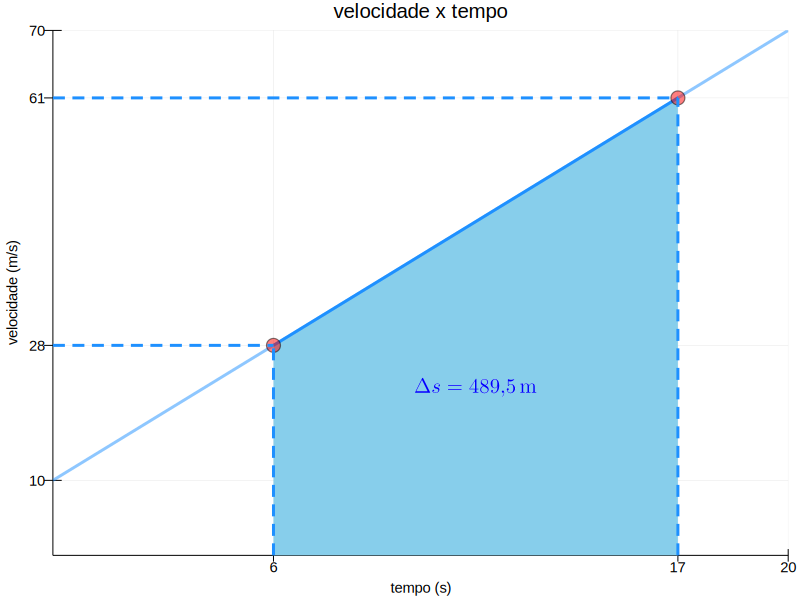

In [1]:
using Plots
using LaTeXStrings
using Printf

#definindo a função v(t): a é a aceleração, v0 é a velocidade inicial, t é o instante de tempo
function vel(a::Real, v0::Real, t::Real)
    return a*t + v0
end

#definindo função para trocar ponto decimal por vírgula decimal nas strings em latex
function pontoVirgula(a::LaTeXString)
    b = replace(a, "." => ",\\!")
    return b
end

#definindo características padrões para os gráficos
default(size = [800,600], grid = true, markersize = 8, framestyle = :origin, linewidth = 3, legend = :false)

#definindo vetor com os valores de t utilizados para desenhar o gráfico
t = 0:1:20
tmax = maximum(t)

#definindo vetor com as velocidades utilizadas para desenhar o gráfico
a = 3
v0 = 10
vx = vel.(a,v0,t)
vxmax = maximum(vx)

#definindo instantes para calculo da área do gráfico
t1 = 6; t2 = 17
Δt = t2 - t1
v11 = vel(a,v0,t1)
v12 = vel(a,v0,t2)

#cálculo da área do trapézio
desl = (v12 + v11) * Δt/2

#string de deslocamento
dsstr = @sprintf("%3.1f", desl)
dstext = latexstring("\\Delta s = ", dsstr, "\\,{\\rm m}")
dstext = pontoVirgula(dstext)

#anotação com o valor da área do gráfico (deslocamento)
annots = [((t1+t2)/2, 0.8*v11, text(dstext, halign = :center, color = :blue, pointsize = 14))]

#desenhando o gráfico de v(t)
plot(t,vx, xaxis = ("tempo (s)", (0, tmax), [0,t1,t2,tmax], font(10)),
    yaxis = ("velocidade (m/s)", (0,vxmax), [v0,v11,v12,vxmax], font(10)), title = "velocidade x tempo",
    color = :dodgerblue, alpha = 0.5)

#marcando a função v(t) entre t1 e t2
plot!([t1,t2],[v11,v12], color = :dodgerblue, fill = (0, :skyblue), ann = annots)

#marcando instantes t1 e t2 no gráfico
scatter!([t1,t2],[v11,v12], marker = :circle, color = :red, alpha = 0.5)

#localizando coordenadas do ponto (v1,t1) no gráfico
plot!([t1,t1],[0,v11], ls = :dash, color = :dodgerblue)
plot!([0,t1],[v11,v11], ls = :dash, color = :dodgerblue)

#localizando coordenadas do ponto (v2,t2) no gráfico
plot!([t2,t2],[0,v12], ls = :dash, color = :dodgerblue)
plot!([0,t2],[v12,v12], ls = :dash, color = :dodgerblue)

A figura formada é um trapézio, e a área $A$ de um trapézio é igual a:

$$ A = \frac{(B + b)\cdot h}{2}, $$

sendo $B$ sua base maior, $b$ sua base menor e $h$ sua altura. A altura do trapézio é igual a $\Delta t_{12} = t_2 - t1$, a base menor é a velocidade no instante $t_1$, $v(t_1)$, e a base maior é $v(t_2)$. Então:

$$ \Delta s_{12} = \frac{\big[v(t_2) + v(t_1)\big] \cdot \Delta t_{12}}{2},$$

mas 

$$v(t_2) = v(t_1) + \Delta v_{12},$$ 

portanto,

$$\Delta s_{12} = \frac{\big[v(t_1) + \Delta v_{12} + v(t_1)\big] \cdot \Delta t_{12}}{2} = \frac{\big[2\cdot v(t_1) + \Delta v_{12} \big] \cdot \Delta t_{12}}{2},$$

$$\Delta s_{12} = v(t_1)\cdot \Delta t_{12} + \frac{\Delta v_{12} \cdot \Delta t_{12}}{2}.$$

Lembrando que $\Delta v_{12} = a \cdot \Delta t_{12}$, é possível fazer outra substituição na equação acima:

$$\Delta s_{12} = v(t_1)\cdot \Delta t_{12} + \frac{a \cdot \Delta t_{12} \cdot \Delta t_{12}}{2},$$

$$\Delta s_{12} = v(t_1)\cdot \Delta t_{12} + \frac{a \cdot \Delta t_{12}^{2}}{2}.$$

Com a equação acima é possível descobrir o deslocamento entre dois instantes de tempo quaisquer, sabendo a aceleração do objeto, sua velocidade no instante inicial e o intervalo de tempo entre os dois instantes. 

Se quisermos calcular o deslocamento $\Delta s(t)$ entre o instante $t=0$ e um instante $t$ qualquer, precisamos apenas substituir $v(t_1)$ por $v_0$, e $\Delta t_{12}$ por $\Delta t = t - 0 = t$ na equação acima, e:

$$\Delta s(t) = v_0 \cdot t + \frac{a \cdot t^2}{2}.$$

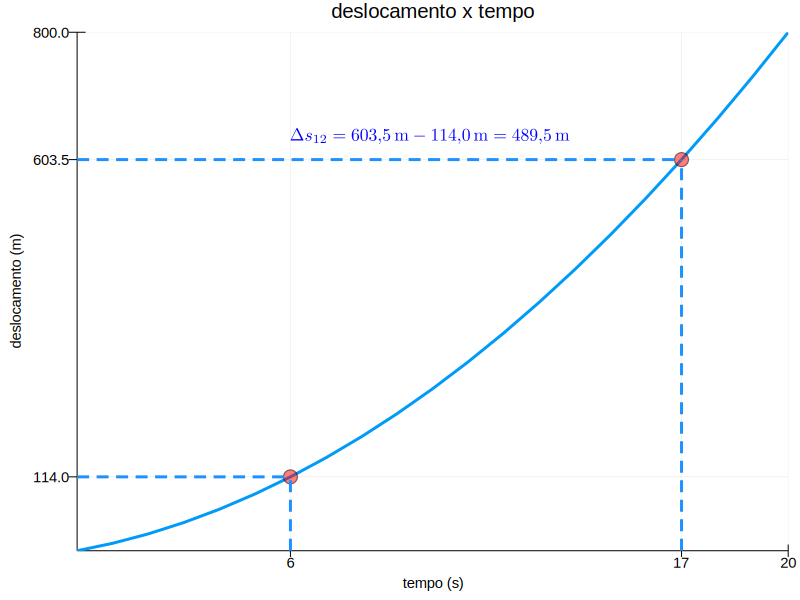

In [2]:
#função que calcula o deslocamento em função do tempo
function sx(a::Real, v0::Real, t::Real)
    return v0*t + (a*t^2)/2
end

#cálculo do deslocamento em função do tempo para os instantes de tempos presentes no vetor t
Δs = sx.(a,v0,t)

#valor do deslocamento máximo
Δsmax = maximum(Δs)

#deslocamento em t1
Δs1 = sx(a,v0,t1)

#deslocamento em t2
Δs2 = sx(a,v0,t2)

#deslocamento entre t1 e t2
Δs12 = Δs2 - Δs1

#string com o valor do deslocamento
s12str = @sprintf("%4.1f", Δs12)
s12text = latexstring("\\Delta s_{12} = ", Δs2, "\\,{\\rm m} -", Δs1, "\\,{\\rm m} = ", s12str, "\\,{\\rm m}")
s12text = pontoVirgula(s12text)

#anotação sobre deslocamento
annotds = [(t1, 0.8*Δsmax, text(s12text, halign = :left, pointsize = 12, color = :blue))]

#gráfico de deslocamento x tempo
plot(t, Δs, xaxis = ("tempo (s)", (0,tmax), [0,t1,t2,tmax], font(10)), 
    yaxis = ("deslocamento (m)", (0,Δsmax), [0,Δs1, Δs2, Δsmax], font(10)), 
    title = "deslocamento x tempo", ann = annotds)

#marcando os instantes t1 e t2 no gráfico
scatter!([t1,t2],[Δs1, Δs2], marker = :circle, color = :red, alpha = 0.5)

#localizando coordenadas do ponto (v1,t1) no gráfico
plot!([t1,t1],[0,Δs1], ls = :dash, color = :dodgerblue)
plot!([0,t1],[Δs1,Δs1], ls = :dash, color = :dodgerblue)

#localizando coordenadas do ponto (v2,t2) no gráfico
plot!([t2,t2],[0,Δs2], ls = :dash, color = :dodgerblue)
plot!([0,t2],[Δs2,Δs2], ls = :dash, color = :dodgerblue)

O gráfico acima mostra a função de deslocamento em função do tempo para o objeto analisado, marcando o deslocamento do objeto nos instantes $t_1$, $\Delta s_1$, e no instante $t_2$, $\Delta s_2$.

Como não houve mudança no sentido do movimento do objeto, o módulo do deslocamento em qualquer instante é igual à distância percorrida pelo objeto. Nem sempre isso é verdade para objetos em MRUV! A partir do deslocamento e da distância percorrida podemos calcular a velocidade média do objeto e sua rapidez média:

In [3]:
#cálculo da velocidade média
vmed12 = Δs12/Δt

#cálculo da rapidez média
rpdmed12 = abs(Δs12)/Δt

#gerando strings de texto
desloctext = @sprintf("Deslocamento entre %3.1f s e %3.1f s: %4.1f m. \n", t1, t2, Δs12)
desloctext = replace(desloctext, "." => ",", count = 3)

disttext = @sprintf("Distância percorrida entre %3.1f s e %3.1f s: %4.1f m. \n", t1, t2, abs(Δs12))
disttext = replace(disttext, "." => ",", count = 3)

velt1text = @sprintf("t = %3.1f s: %4.1f m/s. \n", t1, v11)
velt1text = replace(velt1text, "." => ",", count = 2)

velt2text = @sprintf("t = %3.1f s: %4.1f m/s. \n", t2, v12)
velt2text = replace(velt2text, "." => ",", count = 2)

velmed = @sprintf("Velocidade media entre %3.1f s e %3.1f s: %4.1f m/s. \n", t1, t2, vmed12)
velmed = replace(velmed, "." => ",", count = 3)

rpdmed = @sprintf("Rapidez média entre %3.1f s e %3.1f s: %4.1f m/s. \n", t1, t2, rpdmed12)
rpdmed = replace(rpdmed, "." => ",", count = 3)

#mostrando strings de texto
printstyled("-------------------------------------------------------\n", color = :blue)
printstyled("Velocidades instantâneas \n", color = :blue)
printstyled(velt1text, color = :blue, bold = :true)
printstyled(velt2text, color = :blue, bold = :true)
printstyled("-------------------------------------------------------\n", color = :blue)
printstyled("-------------------------------------------------------\n", color = :red)
printstyled(desloctext, color = :red, bold = :true)
printstyled(disttext, color = :red, bold = :true)
printstyled("-------------------------------------------------------\n", color = :red)
printstyled("-------------------------------------------------------\n", color = :green)
printstyled(velmed, color = :green, bold = :true)
printstyled(rpdmed, color = :green, bold = :true)
printstyled("-------------------------------------------------------\n", color = :green)

-------------------------------------------------------
Velocidades instantâneas 
t = 6,0 s: 28,0 m/s. 
t = 17,0 s: 61,0 m/s. 
-------------------------------------------------------
-------------------------------------------------------
Deslocamento entre 6,0 s e 17,0 s: 489,5 m. 
Distância percorrida entre 6,0 s e 17,0 s: 489,5 m. 
-------------------------------------------------------
-------------------------------------------------------
Velocidade media entre 6,0 s e 17,0 s: 44,5 m/s. 
Rapidez média entre 6,0 s e 17,0 s: 44,5 m/s. 
-------------------------------------------------------


Se a posição do objeto for conhecida em qualquer instante de tempo, é possível obter a equação da posição em função do tempo através da análise do deslocamento que foi feita acima. Voltando à equação do deslocamento em função do tempo, temos:

$$\Delta s(t) = v_0 \cdot t + \frac{a \cdot t^2}{2},$$

como $\Delta s(t) = s(t) - s_0$, onde $s_0$ é a posição inicial do objeto, então:

$$s(t) - s_0 = v_0 \cdot t + \frac{a \cdot t^2}{2},$$

$$s(t) = s_0 + v_0 \cdot t + \frac{a \cdot t^2}{2}.$$

Os coeficientes que definem a equação que descreve a posição do objeto em função do tempo no MRUV são: posição inicial, $s_0$; velocidade inicial, $v_0$; e a aceleração constante $a$.

Vamos supor para o objeto analisado que sua posição no instante $t = 7,\!0\,\rm{s}$, seja $s = 100\,{\rm m}$, como descobrimos sua equação de $s(t)$?

Se 

$$s(7,\!0\,{\rm s}) = s_0 + v_0 \cdot 7,\!0\,{\rm s} + \frac{a \cdot (7,\!0\,{\rm s})^2}{2} = 100\,{\rm m}$$
$$\Downarrow$$
$$s_0 = 100\,{\rm m} - v_0 \cdot 7,\!0\,{\rm s} - \frac{a \cdot (7,\!0\,{\rm s})^2}{2}.$$

In [4]:
#cálculo a posição inicial
s0 = 100 - v0*7 - a*(7^2)/2

#escreve a posição inicial
s0text = @sprintf("Posição inicial = %4.1f m", s0)
s0text = replace(s0text, "." => ",")
printstyled(s0text, color = :red, bold = :true)

Posição inicial = -43,5 m

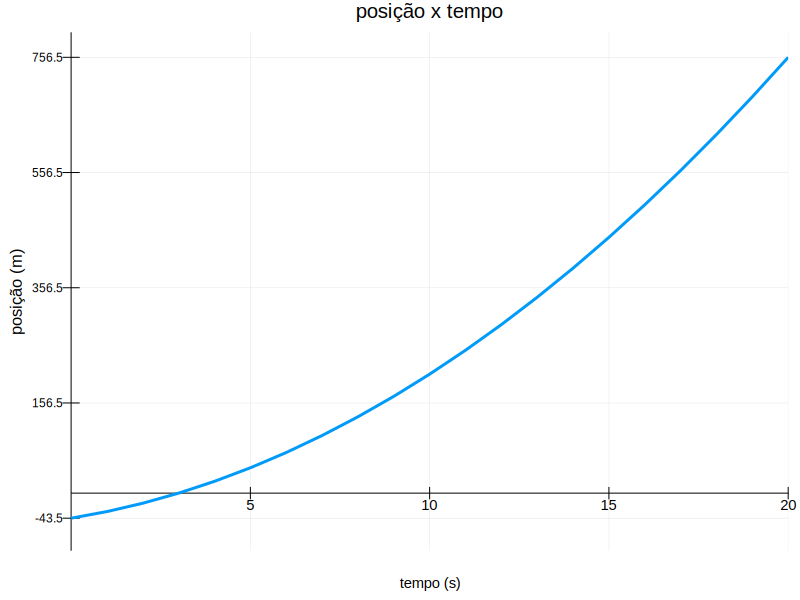

In [5]:
#função que calcula a posição em função do tempo no MRUV
function xp(s0::Real,v0::Real,a::Real,t::Real)
    return s0 + v0*t + (a*t^2)/2
end

#posição do objeto nos instantes definidos por t
s = xp.(s0,v0,a,t)

#posição máxima dentro de s
smax = maximum(s)

#posição mínima dentro de s
smin = minimum(s)

#definindo limites do eixo y
ylim = (floor(smin, digits = -2), ceil(smax, digits = -2))

#desenhando gráfico de posição x tempo
plot(t,s, title = "posição x tempo", xaxis = ("tempo (s)", (0,tmax), range(0, tmax, length = 5), font(10)),
    yaxis = ("posição (m)", ylim, range(smin, smax, length = 5)))

┌ Info: Saved animation to 
│   fn = /home/ghralima/Codes/Notebooks/mecanica/tmp.gif
└ @ Plots /home/ghralima/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/ghralima/Codes/Notebooks/mecanica/tmp.gif")
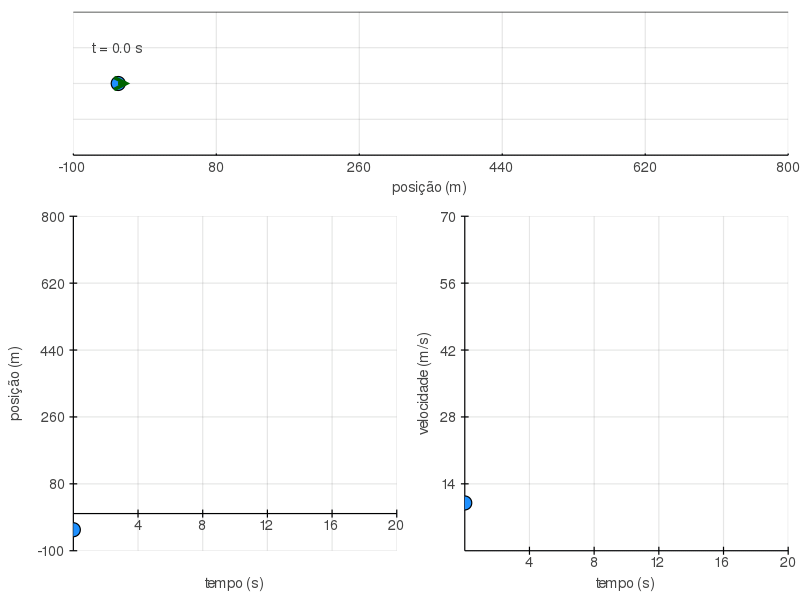

In [6]:
dt = 0.1
t_ani = 0:dt:20

#s0 = 200
#v0 = 40
#a = -5

x_ani = xp.(s0,v0,a,t_ani)
x_max = maximum(x_ani)
x_min = minimum([x_ani;0])
xlim = (floor(x_min, digits = -2), ceil(x_max, digits = -2))

y_ani = zeros(size(t_ani,1))

v_ani = vel.(a,v0,t_ani)
v_max = maximum(v_ani)
v_min = minimum([v_ani;0])


@gif for i = 1:size(t_ani,1)
        
    #anotação de tempo acima do objeto em movimento
    ann_t = [(x_ani[i], 2.5, text(@sprintf("t = %3.1f s", t_ani[i]), pointsize = 10, halign = :center))]
    
    p1 = scatter([x_ani[i]], [y_ani[i]], marker = :circle, color = :dodgerblue,
        xaxis = ("posição (m)", xlim, range(xlim[1], xlim[2], length = 6), font(10)),
        ylims = (-5,5), yaxis = (showaxis = :off), framestyle = :box, ann = ann_t)
    quiver!([x_ani[i]], [y_ani[i]], quiver = ([v_ani[i]],[0]), lw = 3, color = :darkgreen)
    
    p2 = scatter([t_ani[i]],[x_ani[i]], marker = :circle, color = :dodgerblue, 
        xaxis = ("tempo (s)", (0,t_ani[end]), range(0,t_ani[end], length = 6), font(10)),
        yaxis = ("posição (m)", xlim, range(xlim[1], xlim[2], length = 6), font(10)),
        framestyle = :origin)
    plot!(t_ani[1:i],x_ani[1:i], lw = 3, ls = :dash, color = :red, alpha = 0.5)
    
    p3 = scatter([t_ani[i]],[v_ani[i]], marker = :circle, color = :dodgerblue, 
        xaxis = ("tempo (s)", (0,t_ani[end]), range(0,t_ani[end], length = 6), font(10)),
        yaxis = ("velocidade (m/s)", (v_min,v_max), range(v_min, v_max, length = 6), font(10)),
        framestyle = :origin)
    plot!(t_ani[1:i],v_ani[1:i], lw = 3, ls = :dash, color = :darkgreen, alpha = 0.5)
    
    l = @layout [a{0.3h}; b c]
    plot(p1, p2, p3, layout=l)

end